In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [2]:
train_df = pd.read_csv("data/nlp-getting-started/train.csv")
test_df = pd.read_csv("data/nlp-getting-started/test.csv")

In [3]:
train_df.head()

,id,keyword,location,text,target
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1


In [4]:
test_df.head()

,id,keyword,location,text
0,0,NaN,NaN,Just happened a terrible car crash
1,2,NaN,NaN,"Heard about #earthquake is different cities, s..."
2,3,NaN,NaN,"there is a forest fire at spot pond, geese are..."
3,9,NaN,NaN,Apocalypse lighting. #Spokane #wildfires
4,11,NaN,NaN,Typhoon Soudelor kills 28 in China and Taiwan


In [5]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7613 entries, 0 to 7612
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   id        7613 non-null   int64 
 1   keyword   7552 non-null   object
 2   location  5080 non-null   object
 3   text      7613 non-null   object
 4   target    7613 non-null   int64 
dtypes: int64(2), object(3)
memory usage: 297.5+ KB


In [6]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3263 entries, 0 to 3262
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   id        3263 non-null   int64 
 1   keyword   3237 non-null   object
 2   location  2158 non-null   object
 3   text      3263 non-null   object
dtypes: int64(1), object(3)
memory usage: 102.1+ KB


Premier apperçus des données, il y a des données manquantes sur la localisation, et sur les keyword. Il faut faire une analyse des données pour voir si les données sont intéressantes et si il faut définir une stratégie de remplissage.

# Analyse des données manquantes

## Keyword

In [7]:
keyword = train_df["keyword"]

In [8]:
keyword.unique()

array([nan, 'ablaze', 'accident', 'aftershock', 'airplane%20accident',
       'ambulance', 'annihilated', 'annihilation', 'apocalypse',
       'armageddon', 'army', 'arson', 'arsonist', 'attack', 'attacked',
       'avalanche', 'battle', 'bioterror', 'bioterrorism', 'blaze',
       'blazing', 'bleeding', 'blew%20up', 'blight', 'blizzard', 'blood',
       'bloody', 'blown%20up', 'body%20bag', 'body%20bagging',
       'body%20bags', 'bomb', 'bombed', 'bombing', 'bridge%20collapse',
       'buildings%20burning', 'buildings%20on%20fire', 'burned',
       'burning', 'burning%20buildings', 'bush%20fires', 'casualties',
       'casualty', 'catastrophe', 'catastrophic', 'chemical%20emergency',
       'cliff%20fall', 'collapse', 'collapsed', 'collide', 'collided',
       'collision', 'crash', 'crashed', 'crush', 'crushed', 'curfew',
       'cyclone', 'damage', 'danger', 'dead', 'death', 'deaths', 'debris',
       'deluge', 'deluged', 'demolish', 'demolished', 'demolition',
       'derail', 'der

Le manque de keyword indique un manque de mot clés. Pour ramplir et éviter d'avoir des valeurs nuls, je vais les changer par des strings vides.

Pour la suite, je pense que ce serait bien de trouver d'une manière ou d'une autres les mots les plus significatifs d'un désastre par analyse sémantique.

In [9]:
train_df["keyword"] = train_df["keyword"].fillna("")

In [10]:
len(train_df["keyword"].unique())

222

## Location

In [11]:
location = train_df["location"]

In [12]:
location.unique()

array([nan, 'Birmingham', 'Est. September 2012 - Bristol', ...,
       'Vancouver, Canada', 'London ', 'Lincoln'], dtype=object)

In [13]:
len(location.unique())

3342

Le nombre de valeur unique et la pertinence entre la location du tweet et le fait que ce soit un désastre me semble faible. Le manque de donnée n'aidant pas, je vais supprimer la colonnes.

In [14]:
train_df.drop("location", axis=1, inplace=True)
test_df.drop("location", axis=1, inplace=True)

Avant de me lancer dans l'analyse du texte, j'aimerais voir d'abord si les mots clés des tweets sont un bon indicateur du désastre.

# Analyse des mots clés et lien avec le désastre

Pour chaque mot clés, je vais calculer le nombre de tweet où le mot apparait et est un désastre sur le nombre de tweet où il apparait.

In [15]:
unique_keywords = train_df["keyword"].unique()

In [16]:
disaster_keywords = {}

for keyword in unique_keywords:
    df_keyword = train_df[train_df["keyword"] == keyword]
    df_keyword_disaster = df_keyword[df_keyword["target"] == 1]
    disaster_keywords[keyword] = len(df_keyword_disaster) / len(df_keyword) 

In [17]:
disaster_keywords = {k : v for k, v in sorted(disaster_keywords.items(), key=lambda item: item[1], reverse = True)}

In [18]:
disaster_keywords

{'debris': 1.0,
 'derailment': 1.0,
 'wreckage': 1.0,
 'outbreak': 0.975,
 'oil%20spill': 0.9736842105263158,
 'typhoon': 0.9736842105263158,
 'suicide%20bombing': 0.9696969696969697,
 'suicide%20bomber': 0.967741935483871,
 'bombing': 0.9310344827586207,
 'rescuers': 0.9142857142857143,
 'suicide%20bomb': 0.9142857142857143,
 'nuclear%20disaster': 0.9117647058823529,
 'evacuated': 0.8888888888888888,
 'razed': 0.8857142857142857,
 'wildfire': 0.8787878787878788,
 'wild%20fires': 0.8709677419354839,
 'airplane%20accident': 0.8571428571428571,
 'buildings%20on%20fire': 0.8484848484848485,
 'mass%20murder': 0.8484848484848485,
 'forest%20fires': 0.84375,
 'bridge%20collapse': 0.8285714285714286,
 'casualties': 0.8,
 'drought': 0.8,
 'forest%20fire': 0.7894736842105263,
 'thunderstorm': 0.7878787878787878,
 'violent%20storm': 0.7878787878787878,
 'evacuation': 0.7777777777777778,
 'earthquake': 0.7692307692307693,
 'sandstorm': 0.7567567567567568,
 'devastation': 0.75,
 'hailstorm': 0.75,

Il y a clairement des mots qui sont en lien avec les tweets désastreux. Je pense qu'un premier travail serait de faire 3 catégories et placés les mots dedans.

Desastre : >=0.8
Quasi désastre >=0.5
Faible désastre < 0.5

In [19]:
def disaster_words_apply(word):
    if disaster_keywords[word] >= 0.8:
        return 2 #Disaster
    elif disaster_keywords[word] >= 0.5:
        return 1 #Almost Disaster
    else:
        return 0 #Weak Disaster

In [20]:
train_df["keyword"] = train_df["keyword"].apply(disaster_words_apply)

In [21]:
train_df["keyword"].unique()

array([1, 0, 2])

<AxesSubplot:xlabel='keyword', ylabel='count'>

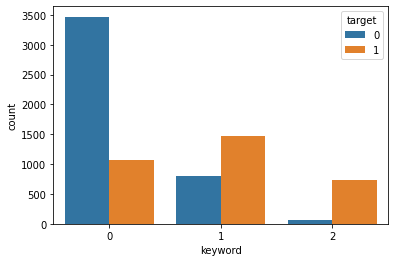

In [22]:
sns.countplot(x = "keyword", hue = "target", data = train_df)

Dans un premier temps, je suis pas trop mal pour prédire les désastres en fonction des keywords

In [23]:
test_df["keyword"] = test_df["keyword"].fillna("")
test_df["keyword"] = test_df["keyword"].apply(disaster_words_apply)

# Analyse des contenus des tweets

Tutoriel sur lequel je me suis basé pour utiliser nltk
https://realpython.com/nltk-nlp-python/


In [24]:
import nltk
nltk.download('punkt')
nltk.download("stopwords")
nltk.download('averaged_perceptron_tagger')
nltk.download('words')
words = nltk.corpus.words.words()

[nltk_data] Downloading package punkt to /home/baptiste/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /home/baptiste/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /home/baptiste/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package words to /home/baptiste/nltk_data...
[nltk_data]   Package words is already up-to-date!


In [25]:
from nltk.tokenize import sent_tokenize, word_tokenize
from nltk.corpus import stopwords

In [26]:
stop_words = set(stopwords.words("english"))
stop_words

{'a',
 'about',
 'above',
 'after',
 'again',
 'against',
 'ain',
 'all',
 'am',
 'an',
 'and',
 'any',
 'are',
 'aren',
 "aren't",
 'as',
 'at',
 'be',
 'because',
 'been',
 'before',
 'being',
 'below',
 'between',
 'both',
 'but',
 'by',
 'can',
 'couldn',
 "couldn't",
 'd',
 'did',
 'didn',
 "didn't",
 'do',
 'does',
 'doesn',
 "doesn't",
 'doing',
 'don',
 "don't",
 'down',
 'during',
 'each',
 'few',
 'for',
 'from',
 'further',
 'had',
 'hadn',
 "hadn't",
 'has',
 'hasn',
 "hasn't",
 'have',
 'haven',
 "haven't",
 'having',
 'he',
 'her',
 'here',
 'hers',
 'herself',
 'him',
 'himself',
 'his',
 'how',
 'i',
 'if',
 'in',
 'into',
 'is',
 'isn',
 "isn't",
 'it',
 "it's",
 'its',
 'itself',
 'just',
 'll',
 'm',
 'ma',
 'me',
 'mightn',
 "mightn't",
 'more',
 'most',
 'mustn',
 "mustn't",
 'my',
 'myself',
 'needn',
 "needn't",
 'no',
 'nor',
 'not',
 'now',
 'o',
 'of',
 'off',
 'on',
 'once',
 'only',
 'or',
 'other',
 'our',
 'ours',
 'ourselves',
 'out',
 'over',
 'own',
 'r

In [27]:
stop_words.add("#")

In [28]:
from nltk.stem import PorterStemmer, SnowballStemmer

In [29]:
stemmer = SnowballStemmer(language = "english")
# Il existe plusieurs type de Stemmer mais pour cette exercice je vais utiliser le même stemmer que celui du tutoriel de nltk
# Il est expliqué que le PorterStemmer est un vieux algorithme et que ce serait bien d'utiliser une version plus récente comme
# le Snowball stemmer
# Le PorterStemmer a des défauts et peu laisser des mots en UnderStemming ou OverStemming (voir site tuto nltk)

In [30]:
import string

tweets = train_df["text"]

print(tweets[0])

# Tokenisation de la phrase par les mots
tweets = tweets.apply(nltk.word_tokenize)

for i, tweet in enumerate(tweets):
    # Suppression des noms propres grâce à l'utilisation de pos tag
    tagged_sentence = nltk.tag.pos_tag(tweet)
    tweet = [word for word,tag in tagged_sentence if tag != 'NNP' and tag != 'NNPS']
    
    tweet = [word for word,tag in tagged_sentence if tag == 'NN' or tag == 'VB' or tag == 'JJ']
    # Suppression des stop words
    tweet = [word.lower() for word in tweet if word.lower() not in stop_words]

    tagged_sentence = nltk.tag.pos_tag(tweet)
    tweet = [word for word,tag in tagged_sentence if tag != 'X']
    
    #tweet = [word for word in words]
    
    # Utilisation d'un stemmer, c'est à dire une fonction qui réduit un mot à sa racine.
    tweet = [stemmer.stem(word) for word in tweet]

    # isalpha permet de supprimer les nombres et la ponctuation
    tweet = [word for word in tweet if word.isalpha()]
    
    tweets[i] = tweet

    
print(tweets[0:5])

Our Deeds are the Reason of this #earthquake May ALLAH Forgive us all
0                                [earthquak]
1                                     [fire]
2    [shelter, place, evacu, shelter, place]
3                                   [receiv]
4                     [photo, smoke, school]
Name: text, dtype: object


In [31]:
#tweets = tweets.tolist()

In [32]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [33]:
def dummy_fun(doc):
    return doc

vectorizer = TfidfVectorizer(
    lowercase = False,
    tokenizer=dummy_fun,
    preprocessor=dummy_fun)

tweets = vectorizer.fit_transform(tweets)

In [34]:
tweets = tweets.toarray()

In [35]:
len(tweets)

7613

In [36]:
type(tweets)

numpy.ndarray

In [37]:
keywords = train_df["keyword"].to_numpy()

In [38]:
np.array([keywords]).T

array([[1],
       [1],
       [1],
       ...,
       [1],
       [1],
       [1]])

In [39]:
len(keywords)

7613

In [40]:
#X = tweets

In [41]:
X = np.concatenate((np.array([keywords]).T, tweets), axis = 1)

In [42]:
y = train_df["target"]

Maintenant que j'ai un jeu de données qui est nettoyer, je vais pourvoir comment à m'amuser et faire un premier test sur l'efficacité des données

In [43]:
from sklearn.model_selection import train_test_split

In [44]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size = 0.3, random_state = 16)

# Training phase

In [45]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier

In [46]:
models = []
models.append(("SVC", LinearSVC()))
models.append(("LogisticRegression", LogisticRegression()))
models.append(("RandomForestClassifier", RandomForestClassifier()))
models.append(("GaussianNB", GaussianNB()))
models.append(("NearestNeighbors", KNeighborsClassifier(n_neighbors = 9)))

In [47]:
for name, model in models:
    model = model.fit(X_train, y_train)
    score = model.score(X_test, y_test)
    print("{name_model} : {score}".format(name_model=name, score=score))

SVC : 0.7570052539404554
LogisticRegression : 0.7618213660245184
RandomForestClassifier : 0.7688266199649737
GaussianNB : 0.5468476357267951
NearestNeighbors : 0.7088441330998249


from lightpredict import LightClassifier
import warnings
warnings.filterwarnings('ignore')

lcf = LightClassifier()
lcf.fit(X_train, X_test, y_train, y_test, rounds=3, plot = True)